# Mistral Large with v2.26 v2 prompt

This notebook outlines the steps undertook to generate a prediction using Mistral Large with prompt from 2/26/25 v2.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import mistral_instructions_v226_v2
MODEL_ID = "mistral.mistral-large-2407-v1:0"
SYSTEM_PROMPT = mistral_instructions_v226_v2

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 4
INFO:root:Completed: 0
INFO:root:Completed: 3
INFO:root:Completed: 1
INFO:root:Completed: 2
INFO:root:Completed: 5
INFO:root:Completed: 6
INFO:root:Completed: 7
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 14
INFO:root:Completed: 13
INFO:root:Completed: 15
INFO:root:Completed: 16
INFO:root:Completed: 17
INFO:root:Completed: 19
INFO:root:Completed: 18
INFO:root:Completed: 21
INFO:root:Completed: 20
INFO:root:Completed: 23
INFO:root:Completed: 22
INFO:root:Completed: 24
INFO:root:Completed: 25
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 29
INFO:root:Completed: 26


CPU times: user 1min 10s, sys: 5.24 s, total: 1min 15s
Wall time: 21min 58s


[{'0005.91306_cites_88693.txt': {'model': 'mistral.mistral-large-2407-v1:0',
   'input_tokens': 5436,
   'output_tokens': 142,
   'prediction': 'no',
   'confidence': 0.9,
   'rationale': 'The passage discusses various cases, including the Target Case, but does not explicitly or implicitly state that the Target Case is overruled. The discussion focuses on the interpretation and application of previous decisions, but there are no Explicit or Implicit Negative Actions taken by the Acting Case against the Target Case.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Huntington v. Texas',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Huntington v. Texas",\n  "overruled": "no",\n  "confidence": 0.90,\n  "rationale": "The passage discusses various cases, including the Target Case, but does not explicitly or implicitly state that the Target Case is overr

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0005.91306_cites_88693.txt,mistral.mistral-large-2407-v1:0,5436.0,142.0,no,0.90,"The passage discusses various cases, including...",Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0001.91306_cites_88061.txt,mistral.mistral-large-2407-v1:0,6464.0,158.0,yes,0.90,The passage explicitly states that the positio...,Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
2,0004.91306_cites_88240.txt,mistral.mistral-large-2407-v1:0,5527.0,165.0,no,0.95,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
3,0002.91306_cites_88994.txt,mistral.mistral-large-2407-v1:0,4874.0,148.0,no,0.95,The passage discusses the Target Case but does...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co. (1875),"```json\n{\n ""instructions"": ""Determine wheth..."
4,0003.91306_cites_87633.txt,mistral.mistral-large-2407-v1:0,3859.0,155.0,no,0.95,The passage from the Acting Case reaffirms the...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/3.mistral/1.mistral_large_v226_v2_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

50

In [8]:
retry = prediction_df[prediction_df["prediction"].isna()]
retry_filenames = retry["filename"].to_list()
retry = df[df["filename"].isin(retry_filenames)]
len(retry)

50

In [10]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0727.109499_cites_106821.txt,mistral.mistral-large-2407-v1:0,5717,154,no,0.90,The passage discusses the Target Case but does...,Determine whether the Acting Case overruled th...,Parden v. Terminal Railway of Alabama State Do...,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0631.108721_cites_2042261.txt,mistral.mistral-large-2407-v1:0,3561,144,no,0.95,The passage discusses the Target Case and its ...,Determine whether the Acting Case overruled th...,Lake Shore Auto Parts Co. v. Korzen,"```json\n{\n ""instructions"": ""Determine wheth..."
2,0710.109508_cites_107123.txt,mistral.mistral-large-2407-v1:0,4805,172,no,0.95,The passages from the Acting Case discuss the ...,Determine whether the Acting Case overruled th...,"Hanna Mining Co. v. District 2, Marine Enginee...","```json\n{\n ""instructions"": ""Determine wheth..."
3,0698.109532_cites_1381163.txt,mistral.mistral-large-2407-v1:0,7225,164,no,0.95,The passages from the Acting Case mention the ...,Determine whether the Acting Case overruled th...,Moore v. State (1975),"```json\n{\n ""instructions"": ""Determine wheth..."
4,0711.109508_cites_106827.txt,mistral.mistral-large-2407-v1:0,4942,164,no,0.95,The passages from the Acting Case discuss the ...,Determine whether the Acting Case overruled th...,"Local 20, Teamsters, Chauffeurs & Helpers Unio...","```json\n{\n ""instructions"": ""Determine wheth..."


In [11]:
retry_df["prediction"].isna().sum()

5

In [12]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [9]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:root:Completed: 726
INFO:root:Completed: 630
INFO:root:Completed: 709
INFO:root:Completed: 697
INFO:root:Completed: 710
INFO:root:Completed: 781
INFO:root:Completed: 782
INFO:root:Completed: 740
ERROR:root:JSON parsing error: Expecting ',' delimiter: line 1 column 358 (char 357). Response json str: {
  "instructions": "Determine whether the Acting Case overruled the Target Case.",
  "target_case": "Geer v. Connecticut",
  "overruled": "yes",
  "confidence": 0.95,
  "rationale": "The passage explicitly states that 'In expressly overruling Geer three years ago, this Court traced the demise of the public ownership theory and definitively recast it as "but a fiction expressive in legal shorthand of the importance to its people that a State have power to preserve and regulate the exploitation of an important resource."' This indicates that the Acting Case has taken explicit negati

CPU times: user 3.4 s, sys: 471 ms, total: 3.87 s
Wall time: 1min 39s


[{'0727.109499_cites_106821.txt': {'model': 'mistral.mistral-large-2407-v1:0',
   'input_tokens': 5717,
   'output_tokens': 154,
   'prediction': 'no',
   'confidence': 0.9,
   'rationale': 'The passage discusses the Target Case but does not explicitly or implicitly overrule it. The passage mentions that the Target Case is not impaired by the decision and that its holdings remain unimpaired. Therefore, there are no Explicit or Implicit Negative Actions taken by the Acting Case to overrule the Target Case.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Parden v. Terminal Railway of Alabama State Docks Department',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Parden v. Terminal Railway of Alabama State Docks Department",\n  "overruled": "no",\n  "confidence": 0.90,\n  "rationale": "The passage discusses the Target Case but does not explicitly or 

In [13]:
prediction_df = comb_prediction_df

In [14]:
prediction_df["prediction"].isna().sum()

5

In [15]:
prediction_df.to_csv("predictions/3.mistral/1.mistral_large_v226_v2_prompt.csv", index=False)

In [33]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/3.mistral/1.mistral_large_v226_v2_prompt.csv")

In [34]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [35]:
assert len(df) == len(prediction_df)

In [36]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,mistral.mistral-large-2407-v1:0,6464,158,yes,0.90,The passage explicitly states that the positio...,Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,mistral.mistral-large-2407-v1:0,4874,148,no,0.95,The passage discusses the Target Case but does...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co. (1875),"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,mistral.mistral-large-2407-v1:0,3859,155,no,0.95,The passage from the Acting Case reaffirms the...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,mistral.mistral-large-2407-v1:0,5527,165,no,0.95,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,mistral.mistral-large-2407-v1:0,5436,142,no,0.90,"The passage discusses various cases, including...",Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


# Run evaluation

In [37]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [38]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [39]:
eval_df["prediction"].value_counts()

prediction
no     938
yes    146
Name: count, dtype: int64

In [40]:
eval_df["input_tokens"].sum()

7039732

In [41]:
eval_df["output_tokens"].sum()

170919

In [42]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [43]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.97      0.97      0.97       935
         Yes       0.80      0.79      0.79       149

    accuracy                           0.94      1084
   macro avg       0.88      0.88      0.88      1084
weighted avg       0.94      0.94      0.94      1084



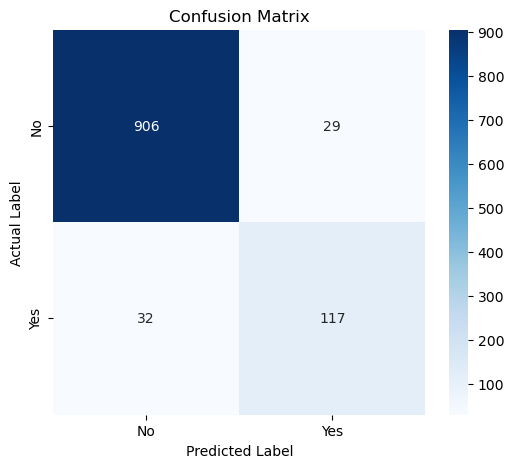

In [44]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [45]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.94
Precision: 0.80
Recall: 0.79
F-score: 0.79
Specificity: 0.97
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 117
True negatives: 906
False positives: 29
False negatives: 32


In [46]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

29

In [47]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

32

# Save the evaluation df

In [48]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,mistral.mistral-large-2407-v1:0,6464,158,yes,0.90,The passage explicitly states that the positio...,Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,mistral.mistral-large-2407-v1:0,4874,148,no,0.95,The passage discusses the Target Case but does...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co. (1875),"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,mistral.mistral-large-2407-v1:0,3859,155,no,0.95,The passage from the Acting Case reaffirms the...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,mistral.mistral-large-2407-v1:0,5527,165,no,0.95,"The passage discusses the Target Case, Texas v...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,mistral.mistral-large-2407-v1:0,5436,142,no,0.90,"The passage discusses various cases, including...",Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


In [49]:
eval_df.to_csv("predictions/3.mistral/1.mistral_large_v226_v2_prompt_eval.csv", index=False)